In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_table('amazon_cells_labelled.txt',header=None, names=['message','is_positive'])

In [3]:
df.head()

,message,is_positive
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [4]:
df.isnull().values.any()

False

In [5]:
keywords = ['Good', 'Bad', 'Excellent', 'Great', 'Best', 'Love', 'Loved', 'Happy', 
            'Nice', 'Easy', 'Very well', 'Broke', 'Broken', 'Not', 'Recommend', 'Worst']

for key in keywords:
    df[str(key)] = df.message.str.contains('(?:(?<=^)|(?<=\s))' + str(key) + '(?=$|[,.!]|\s)', case=False)

Here we're extracting features to use for our Naive Bayes Bournelli Model using keywords. These keywords we will use in the model to predict if the review is positive or negative.

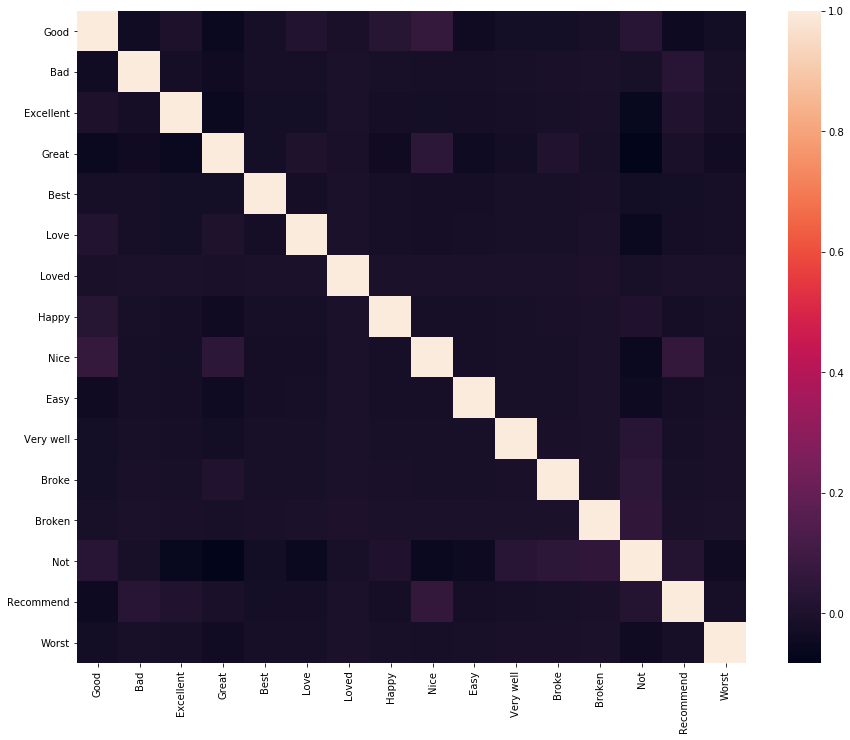

In [6]:
#Doing a heat map of our independent variables
fig, ax = plt.subplots(figsize=(15,12)) 
sns.heatmap(df[keywords].corr())
plt.show()

Making sure our variables have low correlation so they work well with our model.

In [7]:
#Setting outcome target and independent variables
data = df[keywords]
target = df['is_positive']

#Running Naive Bayes Bernoulli with 3 folds
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
bnb = BernoulliNB()
y_pred = []
for train, test in skf.split(data, target):
    data_train, data_test = data.iloc[train], data.iloc[test]
    target_train, target_test = target.iloc[train], target.iloc[test]
    bnb.fit(data_train, target_train)
    y_pred.extend(bnb.predict(data_test))


In [8]:
# Calculating confusion matrix.
from sklearn.metrics import confusion_matrix
print(confusion_matrix(target, y_pred))

df['y_pred'] = y_pred

fp = df.loc[(df['is_positive'] ==False) & (df['y_pred'] == True)].shape[0]
fn = df.loc[(df['is_positive'] ==True) & (df['y_pred'] == False)].shape[0]
sense = df.loc[(df['is_positive'] ==True) & (df['y_pred'] == True)].shape[0]
spec = df.loc[(df['is_positive'] ==False) & (df['y_pred'] == False)].shape[0]

print('\nFalse Positive:{}\nFalse Negative:{}\nSensitivity:{}\nSpecificity:{}'.format(fp,fn,sense,spec))

print('Accuracy:',(target == y_pred).sum() / data.shape[0])

[[471  29]
 [250 250]]

False Positive:29
False Negative:250
Sensitivity:250
Specificity:471
Accuracy: 0.721


In [9]:
#Running model on IMDB data set
imdb_df = pd.read_table('imdb_labelled.txt',header=None, names=['message','is_positive'])

for key in keywords:
    imdb_df[str(key)] = imdb_df.message.str.contains('(?:(?<=^)|(?<=\s))' + str(key) + '(?=$|[,.!]|\s)', case=False)

#Setting outcome target and independent variables
data = imdb_df[keywords]
target = imdb_df['is_positive']

#Running Naive Bayes Bernoulli with 3 folds
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
bnb = BernoulliNB()
y_pred = []
for train, test in skf.split(data, target):
    data_train, data_test = data.iloc[train], data.iloc[test]
    target_train, target_test = target.iloc[train], target.iloc[test]
    bnb.fit(data_train, target_train)
    y_pred.extend(bnb.predict(data_test))

print("Number of mislabeled points out of a total {} points : {}\n".format(
    data.shape[0],
    (target != y_pred).sum()
))

# Calculating confusion matrix and accuracy.
from sklearn.metrics import confusion_matrix
print(confusion_matrix(target, y_pred))
print('Accuracy:',(target == y_pred).sum() / data.shape[0])

Number of mislabeled points out of a total 748 points : 314

[[ 72 290]
 [ 24 362]]
Accuracy: 0.580213903743


In [10]:
#Running model on Yelp data set
yelp_df = pd.read_table('yelp_labelled.txt',header=None, names=['message','is_positive'])

for key in keywords:
    yelp_df[str(key)] = yelp_df.message.str.contains('(?:(?<=^)|(?<=\s))' + str(key) + '(?=$|[,.!]|\s)', case=False)

#Setting outcome target and independent variables
data = yelp_df[keywords]
target = yelp_df['is_positive']

#Running Naive Bayes Bernoulli with 3 folds
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
bnb = BernoulliNB()
y_pred = []
for train, test in skf.split(data, target):
    data_train, data_test = data.iloc[train], data.iloc[test]
    target_train, target_test = target.iloc[train], target.iloc[test]
    bnb.fit(data_train, target_train)
    y_pred.extend(bnb.predict(data_test))

print("Number of mislabeled points out of a total {} points : {}\n".format(
    data.shape[0],
    (target != y_pred).sum()
))

# Calculating confusion matrix and accuracy.
from sklearn.metrics import confusion_matrix
print(confusion_matrix(target, y_pred))
print('Accuracy:',(target == y_pred).sum() / data.shape[0])

Number of mislabeled points out of a total 1000 points : 362

[[455  45]
 [317 183]]
Accuracy: 0.638


### Do any of your classifiers seem to overfit?

Yes my original classifier for the amazon db was overfit. Had a few keywords with only a couple of counts, and those features didn't translate to data that wasn't trained.

### Which seem to perform the best? Why?

Features and keywords with more counts had a tendency to perform well on data that wasn't trained. They also need to be keywords which were more general and strongly postive or negative.

### What features seemed to be most impactful to performance?

'Not' and 'Excellent' features both gave me about 1.5% to 3% accuracy across all three data sets. Also regex helped improved performance of keywords.

Had the most trouble with False negatives. Looking at the data they lacked potential keywords.